In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Dataset Loading and Initial Inspection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Crime_Data_from_2020_to_2025.csv", low_memory=False)



This is a offical dataset of crimes reported by LAPD [Los Angeles Police Departement] from the year 2020-2025.

In [ ]:
#Dataset Shape
df.shape


(1004991, 28)

The dataset has over 1M rows and 28 columns.

In [ ]:
# columns name are in uppercase so to maintain the consistency and clarity they are coverted into lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# shows the top 5 rows of the dataset
df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,211507896,2021 Apr 11 12:00:00 AM,2020 Nov 07 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,2020 Oct 21 12:00:00 AM,2020 Oct 18 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024 Dec 10 12:00:00 AM,2020 Oct 30 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,2020 Dec 24 12:00:00 AM,2020 Dec 24 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,2020 Oct 03 12:00:00 AM,2020 Sep 29 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [ ]:
#columns in the dataset
df.columns


Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')

The dataset is Comprehensive and contains various temporal features like dr_no  [division of record number], date of crime reported,data and time of crime occurance. Spatial Features like area, area_name, location, cross_street lat and lon.

It also provides a clear view of serious and non serious crimes identified by part 1 and 2 with various other premise characteristics like crime codes, weapon descriptions and code. Victim demographics are also recorced through various dimension like age, sex and descent  mocodes are the specific techniques, behaviors, and habitual procedures an offender uses to successfully commit a crime.

Finally, the outcome of each reports are maintained in status descritpion and status as in binary form of the description.

In [ ]:
# Mapping the short names to  descriptive for better clarity
mapping = {
    'dr_no': 'division_number',
    'date_rptd': 'date_reported',
    'date_occ': 'date_occurred',
    'rpt_dist_no': 'reporting_district',
    'part_1-2': 'part',
    'crm_cd': 'crime_code',
    'crm_cd_desc': 'crime_description',
    'mocodes': 'modus_operandi',
    'vict_age': 'victim_age',
    'vict_sex': 'victim_sex',
    'vict_descent': 'victim_descent',
    'premis_cd': 'premise_code',
    'premis_desc': 'premise_description',
    'weapon_used_cd': 'weapon_code',
    'weapon_desc': 'weapon_description',
    'status_desc': 'status_description',
    'crm_cd_1': 'crime_code_1',
    'crm_cd_2': 'crime_code_2',
    'crm_cd_3': 'crime_code_3',
    'crm_cd_4': 'crime_code_4',
    'lat': 'latitude',
    'lon': 'longitude'
}

df = df.rename(columns=mapping)

# Check the new names
print(df.columns)

Index(['division_number', 'date_reported', 'date_occurred', 'time_occ', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')


In [ ]:
# Different types of columns in the dataset
datetime_features = [
    "date_reported",
    "date_occurred"
]

categorical_features = [
    "area",
    "area_name",
    "crime_code",
    "crime_description",
    "modus_operandi",
    "victim_sex",
    "victim_descent",
    "premise_code",
    "premise_description",
    "weapon_code",
    "weapon_description",
    "status",
    "status_description",
    "location",
    "cross_street",
    "crime_code_1",
    "crime_code_2",
    "crime_code_3",
    "crime_code_4"
]

numerical_features = [
    "division_number",
    "reporting_district",
    "part",
    "victim_age",
    "latitude",
    "longitude"
]


In [ ]:
# data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   division_number      1004991 non-null  int64  
 1   date_reported        1004991 non-null  object 
 2   date_occurred        1004991 non-null  object 
 3   time_occ             1004991 non-null  int64  
 4   area                 1004991 non-null  int64  
 5   area_name            1004991 non-null  object 
 6   reporting_district   1004991 non-null  int64  
 7   part                 1004991 non-null  int64  
 8   crime_code           1004991 non-null  int64  
 9   crime_description    1004991 non-null  object 
 10  modus_operandi       853372 non-null   object 
 11  victim_age           1004991 non-null  int64  
 12  victim_sex           860347 non-null   object 
 13  victim_descent       860335 non-null   object 
 14  premise_code         1004975 non-null  float64
 15

There are 8 float columns, 6 int and 13 objects.

# 2. Missing values

In [ ]:
# missing values count
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts


,0
crime_code_4,1004927
crime_code_3,1002677
crime_code_2,935831
cross_street,850755
weapon_code,677744
weapon_description,677744
modus_operandi,151619
victim_descent,144656
victim_sex,144644
premise_description,588


In [ ]:
# missing value percentage
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percentage


,0
crime_code_4,99.993632
crime_code_3,99.769749
crime_code_2,93.118346
cross_street,84.652997
weapon_code,67.437818
weapon_description,67.437818
modus_operandi,15.086603
victim_descent,14.393761
victim_sex,14.392567
premise_description,0.058508


The dataset exhibits significant data sparsity in several key features, most notably in the auxiliary crime categories (crime_code_2, 3, and 4) and cross_street, where missing values exceed 84%. Incorporating these columns into a model would likely introduce severe data imbalance and "noise," as any resulting patterns would be based on an unrepresentative subset of the 1,004,991 records. Furthermore, the high absence of data in weapon-related and demographic fields (approximately 14–67% missing) suggests that secondary descriptors are often unrecorded; therefore, analysis should prioritize the "core" features like date, location, and primary crime description, which remain 100% complete and reliable.

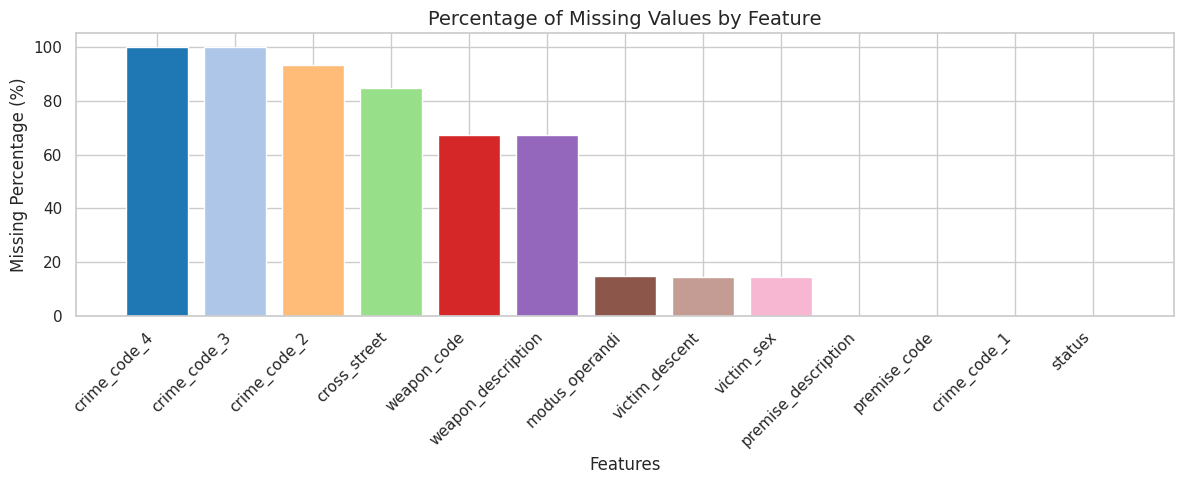

In [ ]:
#missing values per column percentage
values = missing_percentage[missing_percentage > 0]

colors = plt.cm.tab20(np.linspace(0, 1, len(values)))

plt.figure(figsize=(12,5))
plt.bar(values.index, values.values, color=colors)

plt.title("Percentage of Missing Values by Feature", fontsize=14)
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


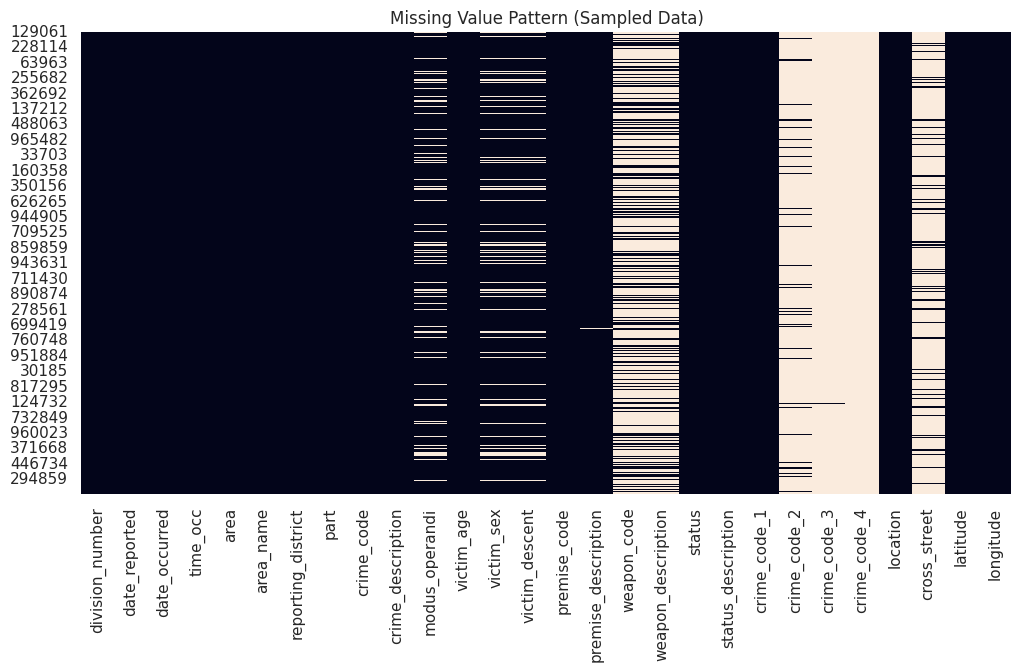

In [ ]:
#Missingness Heatmap
sample_df = df.sample(10000, random_state=42)

plt.figure(figsize=(12,6))
sns.heatmap(sample_df.isnull(), cbar=False)
plt.title("Missing Value Pattern (Sampled Data)")
plt.show()


# 3 Target Variable Exploration

What are we trying to predict how imbalanced are status / status_description columns as as they are major component for our goal that is investigation delay.

In [ ]:
#unique values check
df["status"].value_counts()


,count
status,
IC,802862
AO,109802
AA,87155
JA,3286
JO,1879
CC,6


In [ ]:
df["status_description"].value_counts()


,count
status_description,
Invest Cont,802862
Adult Other,109802
Adult Arrest,87155
Juv Arrest,3286
Juv Other,1879
UNK,7


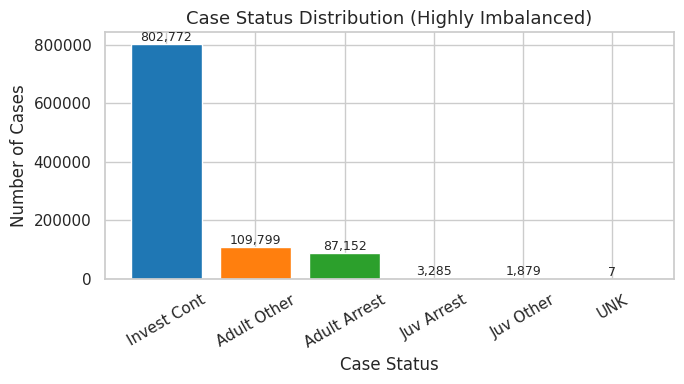

In [ ]:
# graph plot of target variable imbalance


status_counts = df["status_description"].value_counts()

colors = plt.cm.tab10(range(len(status_counts)))

plt.figure(figsize=(7,4))
bars = plt.bar(
    status_counts.index,
    status_counts.values,
    color=colors
)

plt.title("Case Status Distribution (Highly Imbalanced)", fontsize=13)
plt.ylabel("Number of Cases")
plt.xlabel("Case Status")
plt.xticks(rotation=30)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


The target variable is highly imbalanced, with nearly 80% of cases classified as ‘Investigation Continued.’ Such imbalance is characteristic of real-world crime data and reflects the inherent difficulty of resolving a large share of reported incidents, reinforcing the need for imbalance-aware modeling approaches.

# 4. Univariate Feature Analysis

Purpose of this step

>Understand individual feature distributions without altering the data.

**A. Categorical feature distributions**

In [ ]:
# top crime types
df["crime_description"].value_counts().head(10)


,count
crime_description,
VEHICLE - STOLEN,115190
BATTERY - SIMPLE ASSAULT,74839
BURGLARY FROM VEHICLE,63517
THEFT OF IDENTITY,62537
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",61092
BURGLARY,57871
THEFT PLAIN - PETTY ($950 & UNDER),53717
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525
INTIMATE PARTNER - SIMPLE ASSAULT,46712


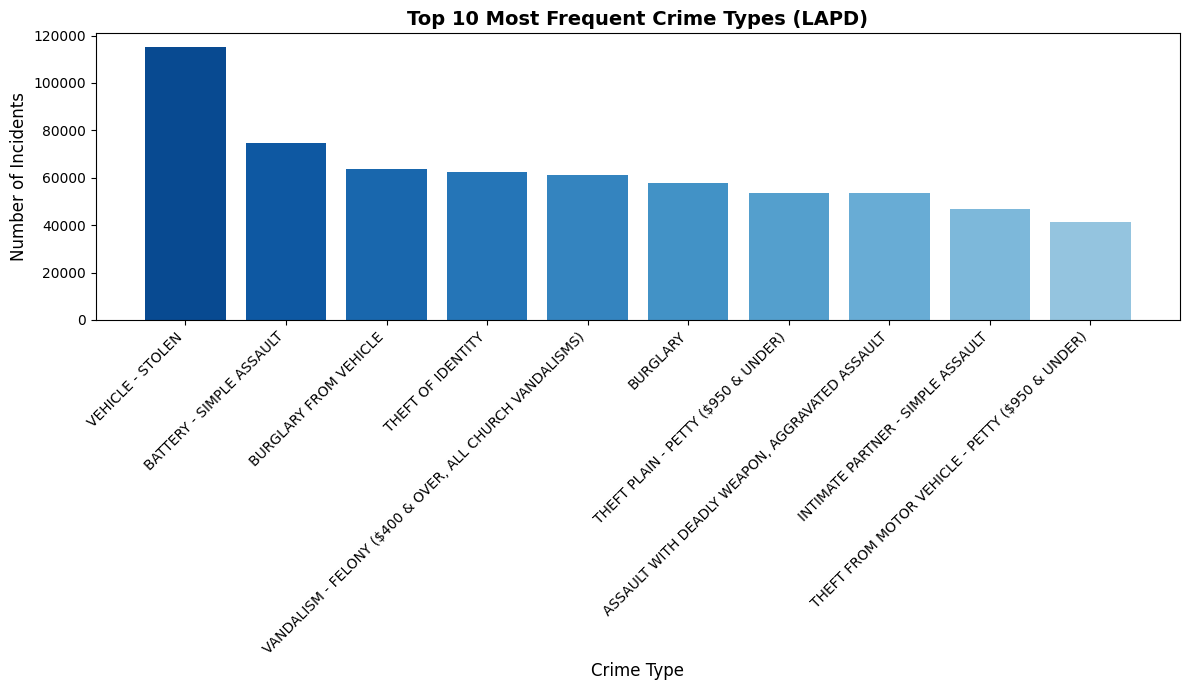

In [ ]:
# Get top 10 crimes (value_counts() is sorted descending by default)
top_crimes = df["crime_description"].value_counts().head(10)
values = top_crimes.values
labels = top_crimes.index

# Color gradient (darker for the highest frequency)
colors = plt.cm.Blues(np.linspace(0.9, 0.4, len(values)))

# Creating the vertical bar chart
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(labels, values, color=colors)

# Adding titles and labels
ax.set_title("Top 10 Most Frequent Crime Types (LAPD)", fontsize=14, fontweight='bold')
ax.set_ylabel("Number of Incidents", fontsize=12)
ax.set_xlabel("Crime Type", fontsize=12)

# Rotate labels 45 degrees so they fit horizontally
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("vertical_crime_plot.png")

In [ ]:
#premise type(where crime occur)
df["premise_description"].value_counts().head(10)


,count
premise_description,
STREET,261284
SINGLE FAMILY DWELLING,163654
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",119011
PARKING LOT,69147
OTHER BUSINESS,47647
SIDEWALK,40861
"VEHICLE, PASSENGER/TRUCK",29302
GARAGE/CARPORT,19362
DRIVEWAY,16082


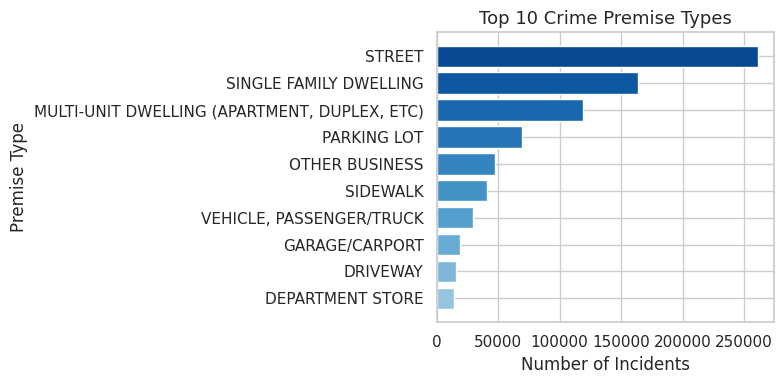

In [ ]:
top_premise = df["premise_description"].value_counts().head(10)

values = top_premise.values[::-1]
labels = top_premise.index[::-1]
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(values)))

plt.figure(figsize=(8,4))
plt.barh(labels, values, color=colors)

plt.title("Top 10 Crime Premise Types", fontsize=13)
plt.xlabel("Number of Incidents")
plt.ylabel("Premise Type")

plt.tight_layout()
plt.show()

In [ ]:
#weapon usage distribution
df["weapon_description"].value_counts().head(10)


,count
weapon_description,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",174761
UNKNOWN WEAPON/OTHER WEAPON,36390
VERBAL THREAT,23846
HAND GUN,20182
SEMI-AUTOMATIC PISTOL,7267
KNIFE WITH BLADE 6INCHES OR LESS,6838
UNKNOWN FIREARM,6582
OTHER KNIFE,5879
MACE/PEPPER SPRAY,3730


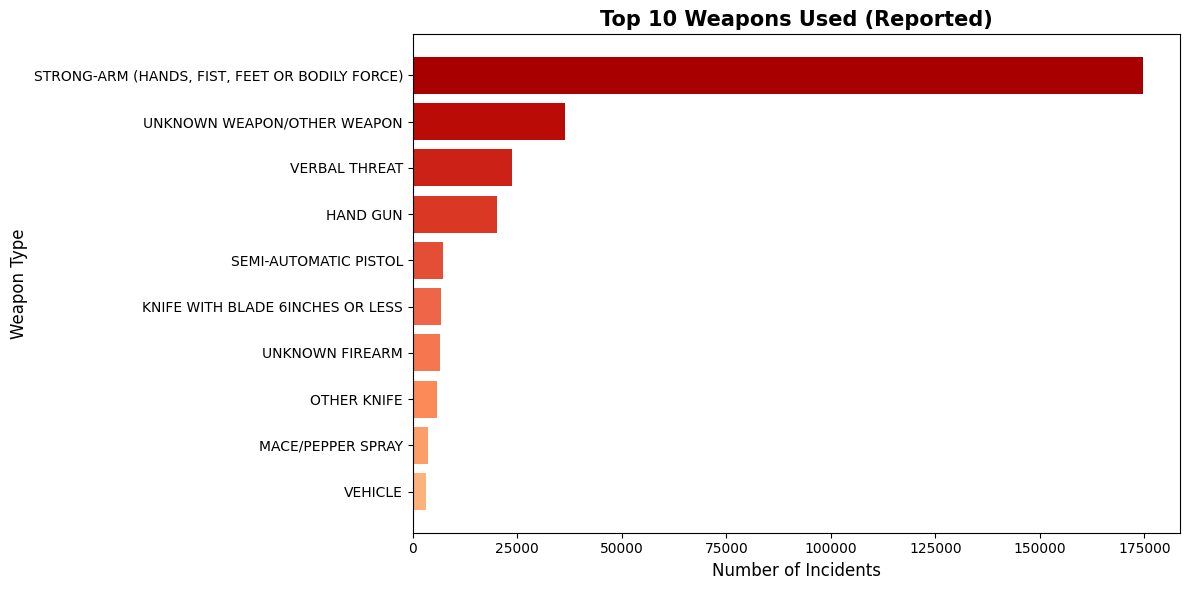

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 weapons
top_weapons = df["weapon_description"].value_counts().head(10)

values = top_weapons.values[::-1]
labels = top_weapons.index[::-1]

# Using a warm color palette (Oranges/Reds)
colors = plt.cm.OrRd(np.linspace(0.4, 0.9, len(values)))

# Increased figure size for better readability of long labels
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(labels, values, color=colors)

# Title and axis labels with adjusted font sizes
ax.set_title("Top 10 Weapons Used (Reported)", fontsize=15, fontweight='bold')
ax.set_xlabel("Number of Incidents", fontsize=12)
ax.set_ylabel("Weapon Type", fontsize=12)

# Adjust layout to prevent label clipping
plt.tight_layout()
plt.savefig("top_weapons_plot.png")

Missing weapons = non-violent crimes

In [ ]:
# victim sex distribution
df["victim_sex"].value_counts(dropna=False)


,count
victim_sex,
M,403879
F,358580
NaN,144644
X,97773
H,114
-,1


In [ ]:
df["victim_descent"].value_counts().head(10)


,count
victim_descent,
H,296404
W,201442
B,135816
X,106685
O,78005
A,21340
K,5990
F,4838
C,4631


In [ ]:
desc_legend = {
    'H': 'Hispanic', 'W': 'White', 'B': 'Black', 'O': 'Other',
    'A': 'Asian', 'F': 'Pacific Islander', 'K': 'Korean',
    'C': 'Chinese', 'U': 'Unknown', 'I': 'American Indian',
    'J': 'Japanese', 'P': 'Filipino', 'V': 'Vietnamese',
    'Z': 'Asian Indian', 'G': 'Guamanian', 'S': 'Samoan',
    'D': 'Cambodian', 'L': 'Laotian', 'X': 'Other Asian',
    'R': 'Other Pacific Islander'
}

df["victim_descent_label"] = df["victim_descent"].map(desc_legend)


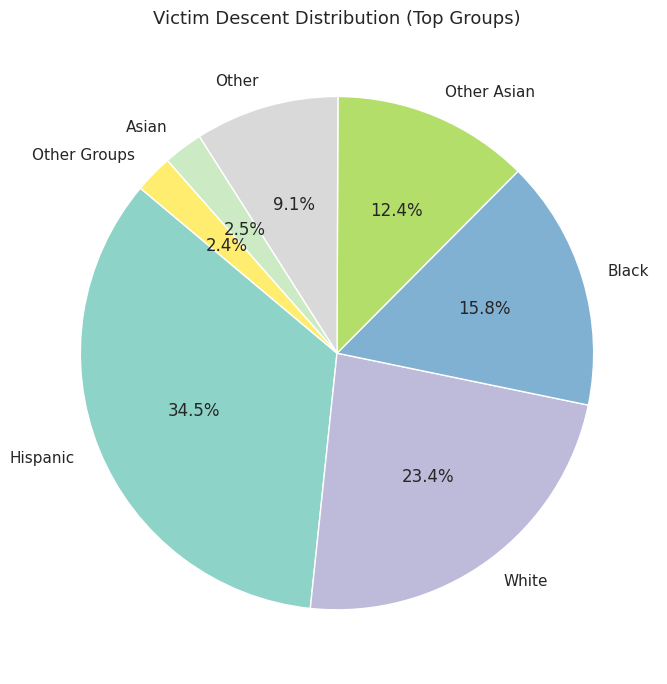

In [ ]:
descent_counts = df["victim_descent_label"].value_counts()

top_n = 6
top_descent = descent_counts.head(top_n)
other_sum = descent_counts[top_n:].sum()

pie_data = top_descent.copy()
pie_data["Other Groups"] = other_sum

colors = plt.cm.Set3(np.linspace(0, 1, len(pie_data)))

plt.figure(figsize=(7,7))
plt.pie(
    pie_data.values,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Victim Descent Distribution (Top Groups)", fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
# crime severity(part)
part_pct = df["part"].value_counts(normalize=True) * 100
part_pct


,proportion
part,
1,59.965214
2,40.034786


Part 1 → Major crimes (includes violent and some high-value property crimes)

Part 2 → Minor crimes (often misdemeanors, petty property, low-priority cases)



In [ ]:
pd.crosstab(df["part"], df["status"], normalize="index") * 100


status,AA,AO,CC,IC,JA,JO
part,,,,,,
1,7.718487,5.699219,0.000664,86.130950,0.356429,0.094251
2,10.100759,18.754008,0.000497,70.536056,0.282841,0.325839


**B. Numerical Feature Analysis**

In [ ]:
# victim age distribution
df["victim_age"].describe()


,victim_age
count,1.004991e+06
mean,2.891706e+01
std,2.199272e+01
min,-4.000000e+00
25%,0.000000e+00
50%,3.000000e+01
75%,4.400000e+01
max,1.200000e+02


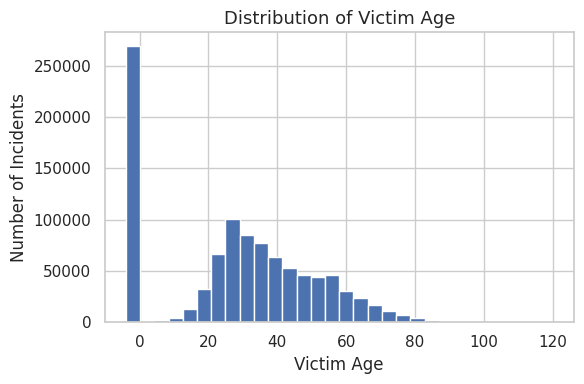

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(
    df["victim_age"],
    bins=30,
    edgecolor="white"
)

plt.title("Distribution of Victim Age", fontsize=13)
plt.xlabel("Victim Age")
plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()

In [ ]:
# Geographic Coordinates
df[["latitude", "longitude"]].describe()


,latitude,longitude
count,1.004991e+06,1.004991e+06
mean,3.399821e+01,-1.180909e+02
std,1.610713e+00,5.582386e+00
min,0.000000e+00,-1.186676e+02
25%,3.401470e+01,-1.184305e+02
50%,3.405890e+01,-1.183225e+02
75%,3.416490e+01,-1.182739e+02
max,3.433430e+01,0.000000e+00


In [ ]:
df_filtered = df[(df['latitude'] !=0) & (df['longitude'] !=0)]

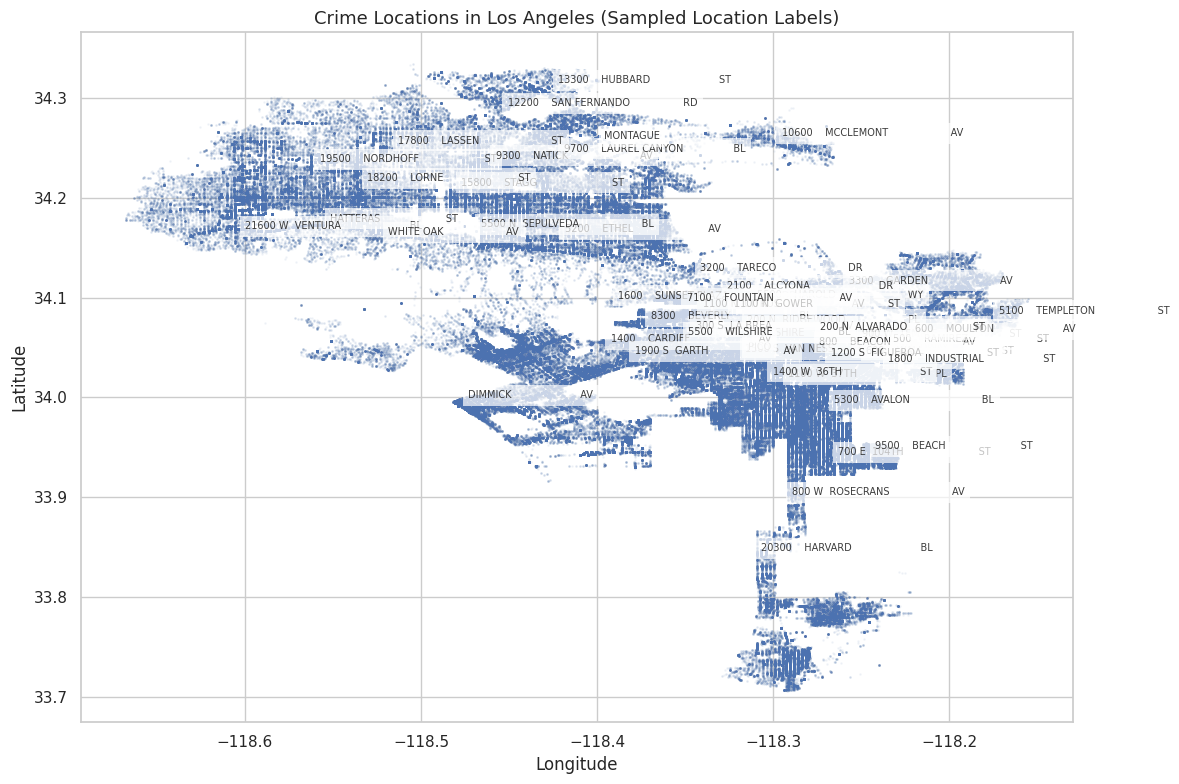

In [ ]:
df_filtered = df[(df['latitude'] != 0) & (df['longitude'] != 0)]
sampled = df_filtered.sample(50, random_state=42)

plt.figure(figsize=(12, 8))
plt.scatter(
    df_filtered['longitude'],
    df_filtered['latitude'],
    s=1,
    alpha=0.05
)

for _, row in sampled.iterrows():
    plt.text(
        row['longitude'],
        row['latitude'],
        row['location'],
        fontsize=7,
        alpha=0.9,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime Locations in Los Angeles (Sampled Location Labels)", fontsize=13)

plt.tight_layout()
plt.show()


/tmp/ipython-input-2964616590.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_occurred'] = pd.to_datetime(df['date_occurred'])


Crime counts per year:
year
2020    199847
2021    209876
2022    235259
2023    232345
2024    127567
2025        97
dtype: int64


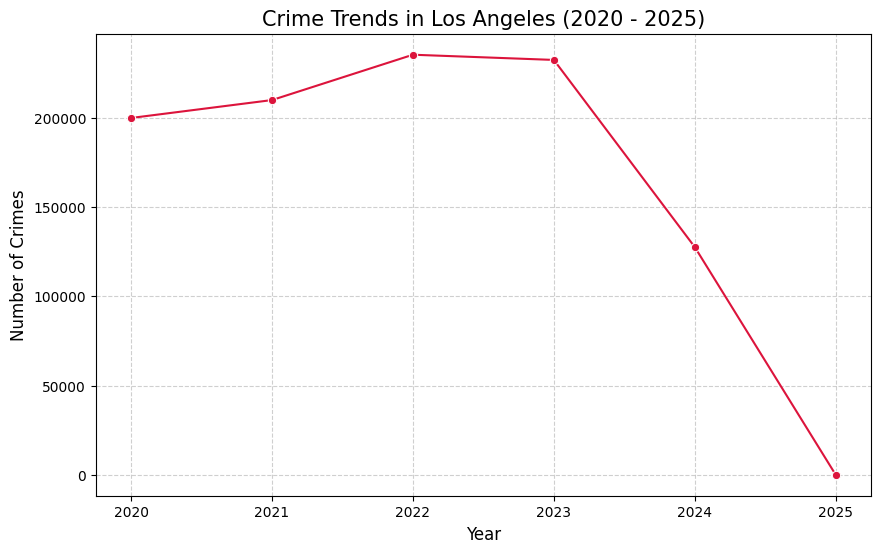

In [ ]:
# 1. Convert the column to datetime format
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

# 2. Extract the Year into a new column
df['year'] = df['date_occurred'].dt.year

# 3. Group by year and count the number of crimes
yearly_counts = df.groupby('year').size()

# 4. Display the table
print("Crime counts per year:")
print(yearly_counts)

# 5. Visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='crimson')
plt.title('Crime Trends in Los Angeles (2020 - 2025)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The crime volume remains fairly constant between 2020 and 2023, then decreases in 2024, and reaches the highest level of sparsity in 2025 representing incompleteness. The 2025 data has less than 100 crime records hence excluded from the further analysis.


In [ ]:
df=df[df['year'] < 2025]

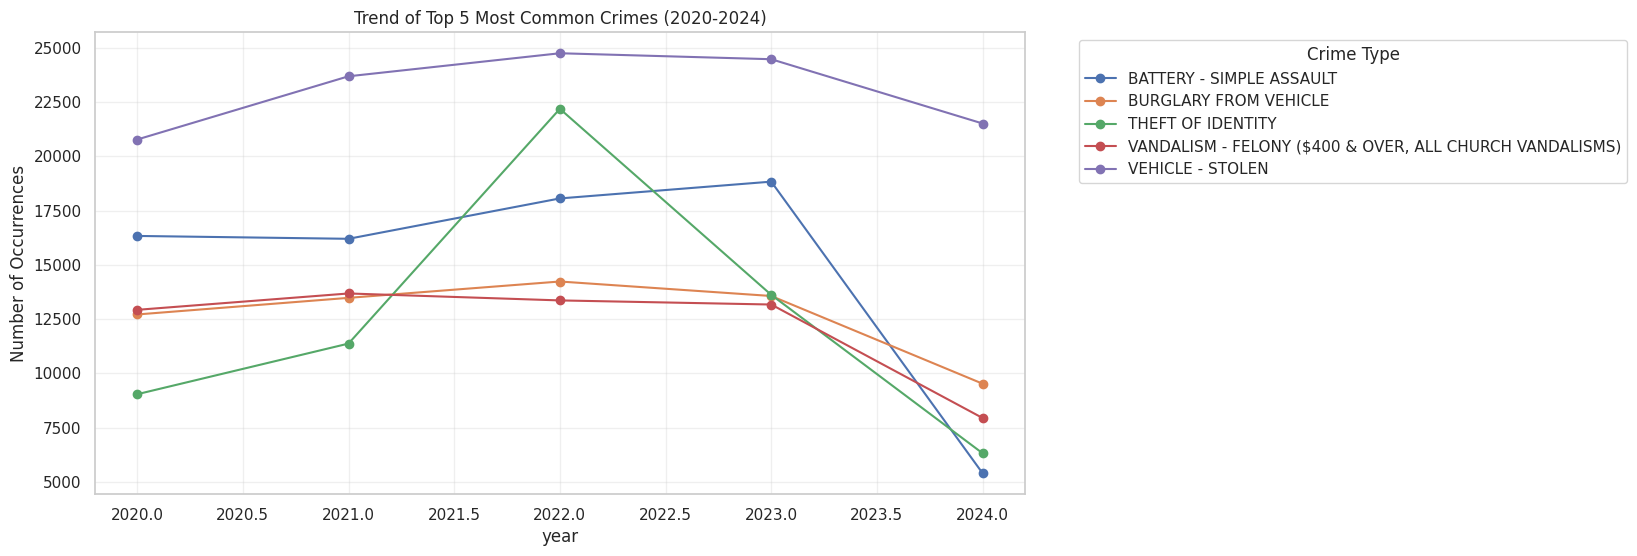

In [ ]:
# 1. Identify the top 5 most frequent crimes overall
top_5_crimes = df['crime_description'].value_counts().nlargest(5).index

# 2. Filter dataframe for only these crimes
df_top_5 = df[df['crime_description'].isin(top_5_crimes)]

# 3. Group by year and crime description
crime_trend = df_top_5.groupby(['year', 'crime_description']).size().unstack()

# 4. Plot
crime_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trend of Top 5 Most Common Crimes (2020-2024)')
plt.ylabel('Number of Occurrences')
plt.grid(True, alpha=0.3)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
df.columns

Index(['division_number', 'date_reported', 'date_occurred', 'time_occ', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude', 'year'],
      dtype='object')

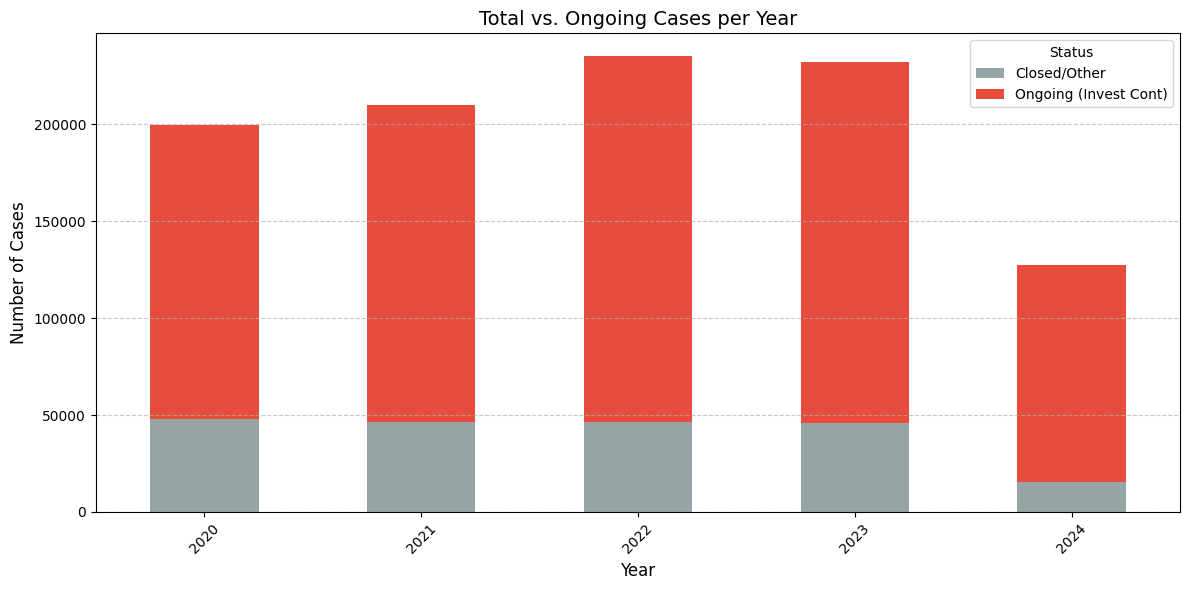

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define what counts as an 'Ongoing' case
# In this dataset, 'Invest Cont' (Investigation Continued) usually means ongoing.
ongoing_status = 'Invest Cont'

# 2. Create a flag for ongoing vs closed
df['is_ongoing'] = df['status_description'] == ongoing_status

# 3. Group by year and status to get counts
yearly_counts = df.groupby(['year', 'is_ongoing']).size().unstack(fill_value=0)

# 4. Plotting
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#95a5a6', '#e74c3c'])

plt.title('Total vs. Ongoing Cases per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Status', labels=['Closed/Other', 'Ongoing (Invest Cont)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-77899031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = (df['time_occ'] / 100).astype(int)
/tmp/ipython-input-77899031.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(yearly_data['hour'], label=str(year), shade=False)
/tmp/ipython-input-77899031.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(yearly_data['hour'], label=str(year), shade=False)
/tmp/ipython-input-77899031.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False

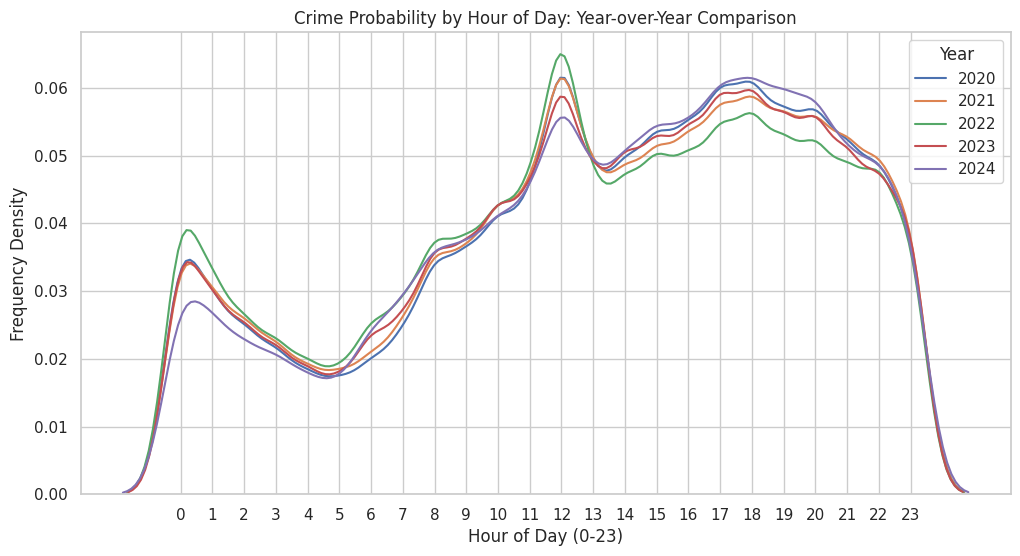

In [ ]:
# Convert time_occ (e.g., 1300) to hour (e.g., 13)

df['hour'] = (df['time_occ'] / 100).astype(int)

plt.figure(figsize=(12, 6))
for year in sorted(df['year'].unique()):
    yearly_data = df[df['year'] == year]
    sns.kdeplot(yearly_data['hour'], label=str(year), shade=False)

plt.title('Crime Probability by Hour of Day: Year-over-Year Comparison')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Frequency Density')
plt.xticks(range(0, 24))
plt.legend(title='Year')
plt.show()

/tmp/ipython-input-1792585228.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


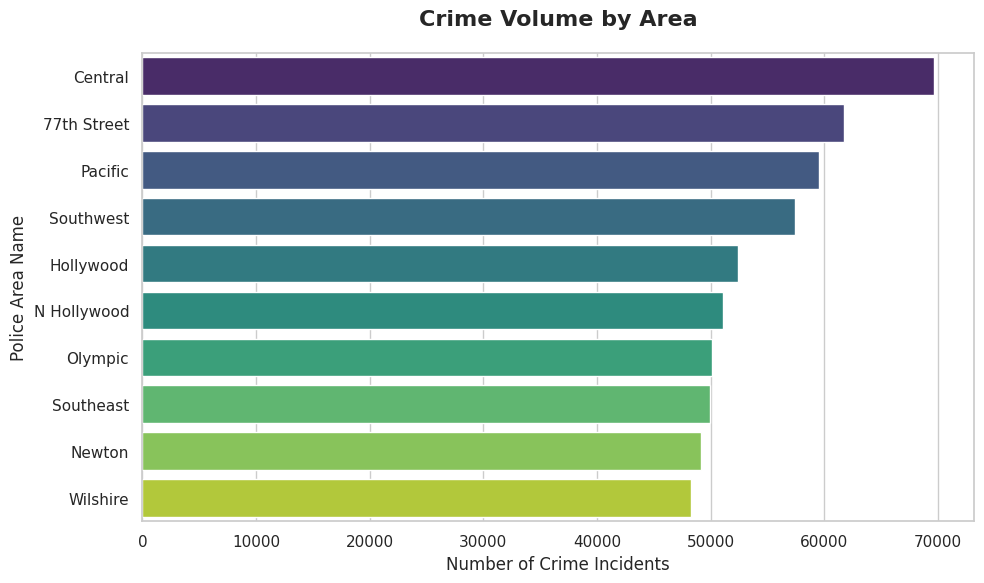

In [ ]:
# Setting the visual style
sns.set_theme(style="whitegrid")

# Gets the Top 10 areas
top_10_counts = df['area_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=top_10_counts.values,
    y=top_10_counts.index,
    palette='viridis'
)

# Titles and labels
plt.title('Crime Volume by Area', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Number of Crime Incidents', fontsize=12)
plt.ylabel('Police Area Name', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-194620481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')


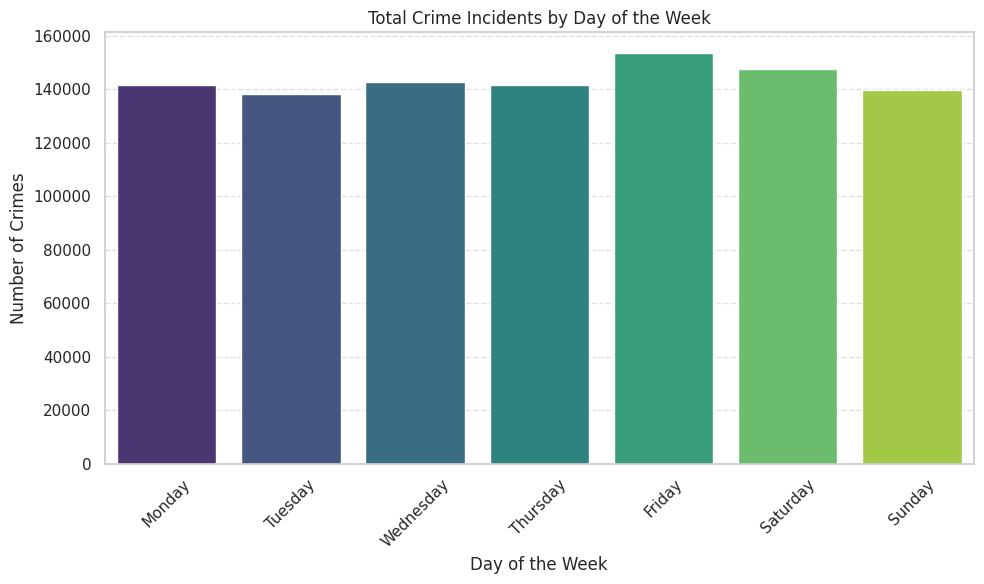

In [ ]:
# Create a new column for the day of the week
df['day_of_week'] = df['date_occurred'].dt.day_name()

# Setting the order of the days so they don't appear alphabetically
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the data
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')

plt.title('Total Crime Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
# Create the missing month column
df['month'] = pd.to_datetime(df['date_occurred']).dt.month

# pivot table
pivot_table = df.pivot_table(index='month', columns='year', values='division_number', aggfunc='count')

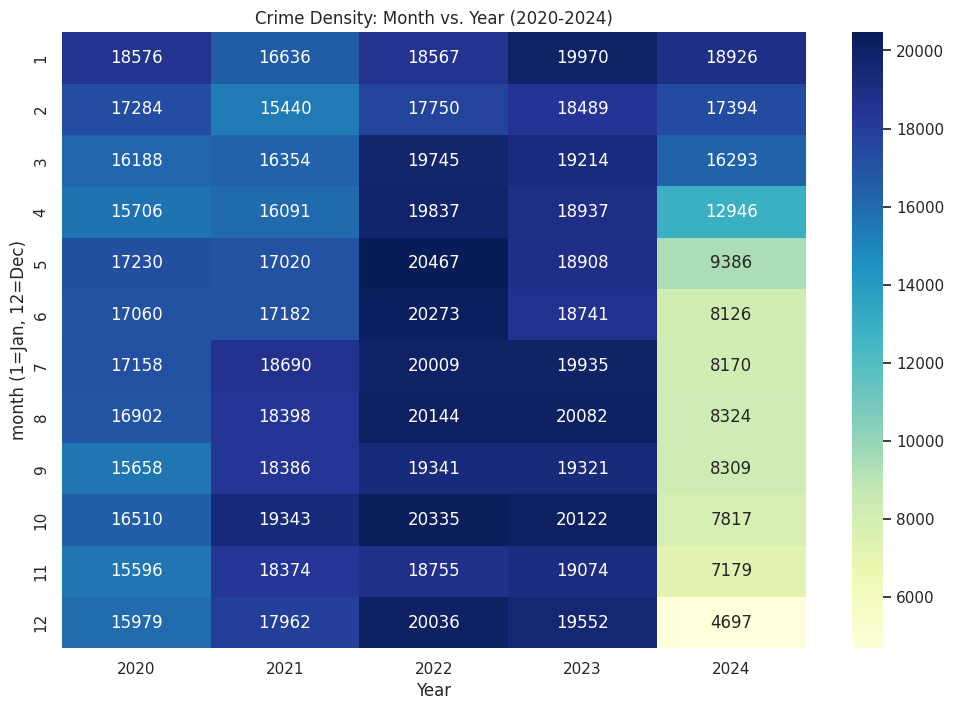

In [ ]:
# 2. FIX: Fill NaN with 0 and convert to integer
pivot_table = pivot_table.fillna(0).astype(int)

# 3. Plot
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Crime Density: Month vs. Year (2020-2024)')
plt.ylabel('month (1=Jan, 12=Dec)')
plt.xlabel('Year')
plt.show()

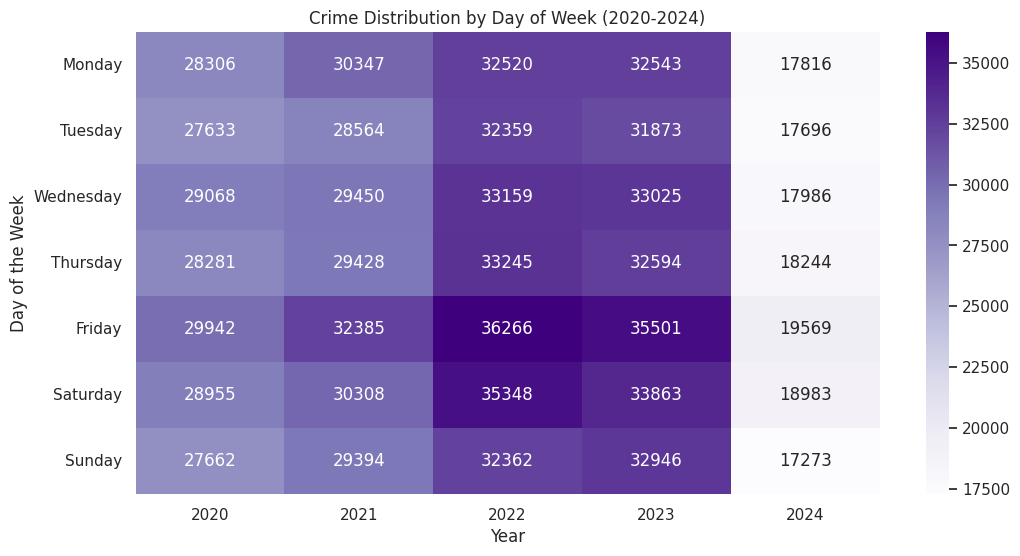

In [ ]:
#Extract Day of Week (0=Monday, 6=Sunday)
df['day_of_week'] = df['date_occurred'].dt.day_name()

#Define the correct order for days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Create pivot table for Days vs Years
day_year_pivot = df.pivot_table(index='day_of_week', columns='year', values='division_number', aggfunc='count').reindex(days_order)

#Plots Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(day_year_pivot.fillna(0).astype(int), annot=True, fmt="d", cmap="Purples")
plt.title('Crime Distribution by Day of Week (2020-2024)')
plt.ylabel('Day of the Week')
plt.xlabel('Year')
plt.show()

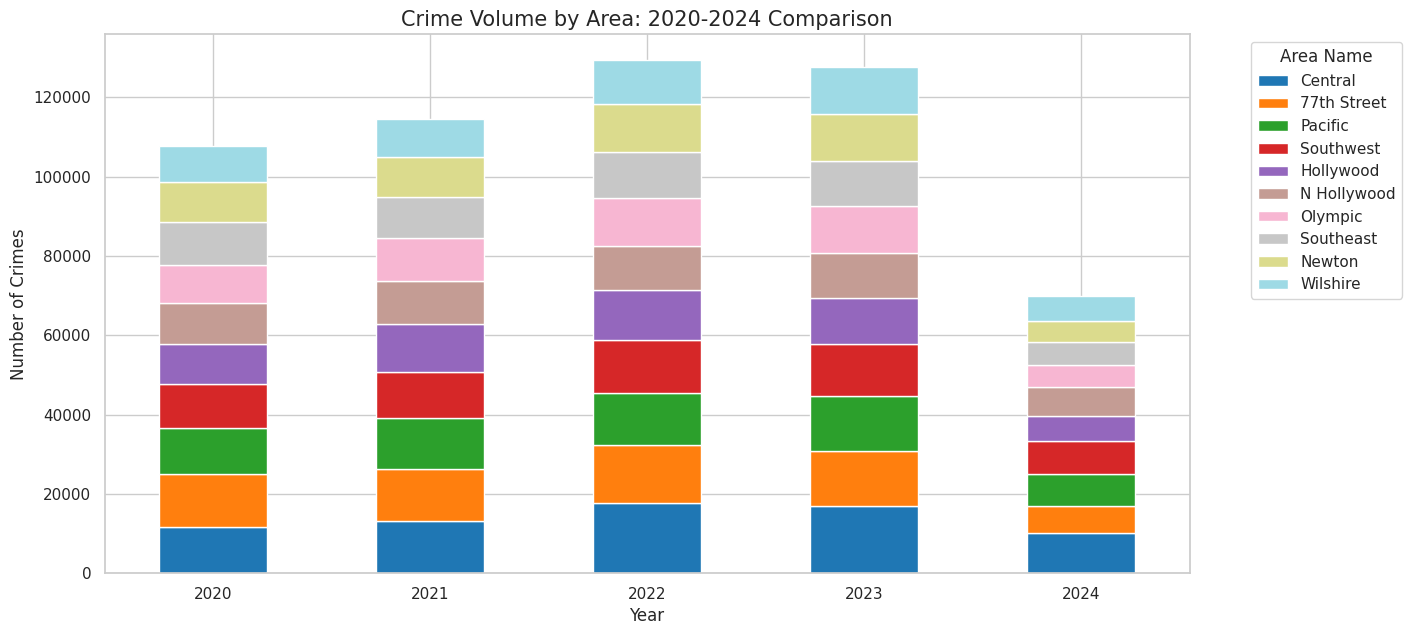

In [ ]:
# Gets the top 10 areas by total crime volume
top_10_areas = df['area_name'].value_counts().nlargest(10).index

# Filter and create a cross-tabulation
area_year_data = pd.crosstab(df['year'], df['area_name'])[top_10_areas]

#Plot as a stacked bar chart
area_year_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Crime Volume by Area: 2020-2024 Comparison', fontsize=15)
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.legend(title='Area Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

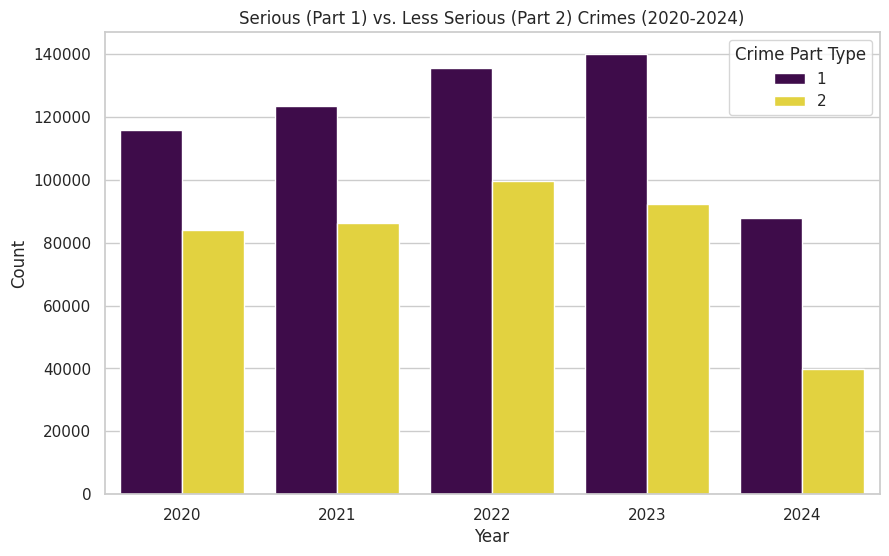

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', hue='part', palette='viridis')
plt.title('Serious (Part 1) vs. Less Serious (Part 2) Crimes (2020-2024)')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Crime Part Type')
plt.show()

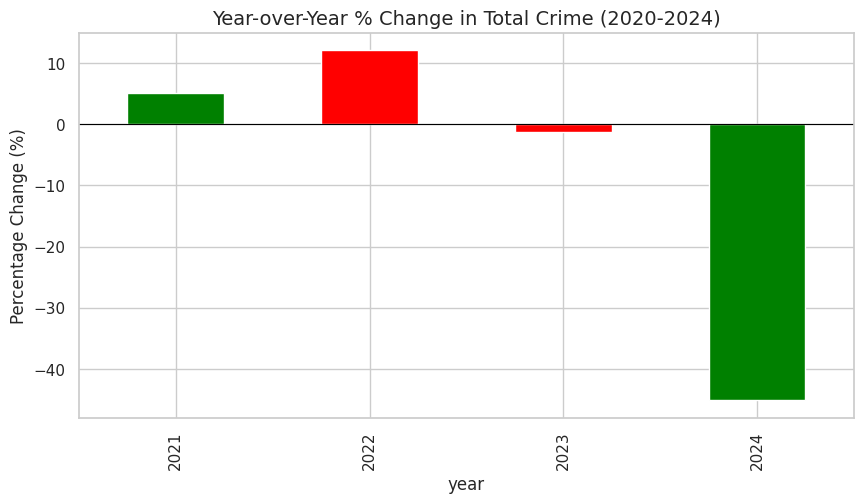

In [ ]:
#Calculate yearly totals
yearly_totals = df.groupby('year').size()

#Calculate percentage change
yoy_change = yearly_totals.pct_change() * 100

# Plot
plt.figure(figsize=(10, 5))
colors = ['red' if x > 0 else 'green' for x in yoy_change]
yoy_change.dropna().plot(kind='bar', color=colors)
plt.title('Year-over-Year % Change in Total Crime (2020-2024)', fontsize=14)
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

In [ ]:
# Ensures date columns are datetime
df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
df['date_occurred'] = pd.to_datetime(df['date_occurred'], errors='coerce')

# Computes investigation duration in years
df['investigation_duration_years'] = (
    (df['date_reported'] - df['date_occurred']).dt.days / 365.25
)

# Keeps only valid positive durations
df = df[df['investigation_duration_years'] >= 0]


/tmp/ipython-input-212719385.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_reported'] = pd.to_datetime(df['date_reported'], errors='coerce')
/tmp/ipython-input-212719385.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_occurred'] = pd.to_datetime(df['date_occurred'], errors='coerce')


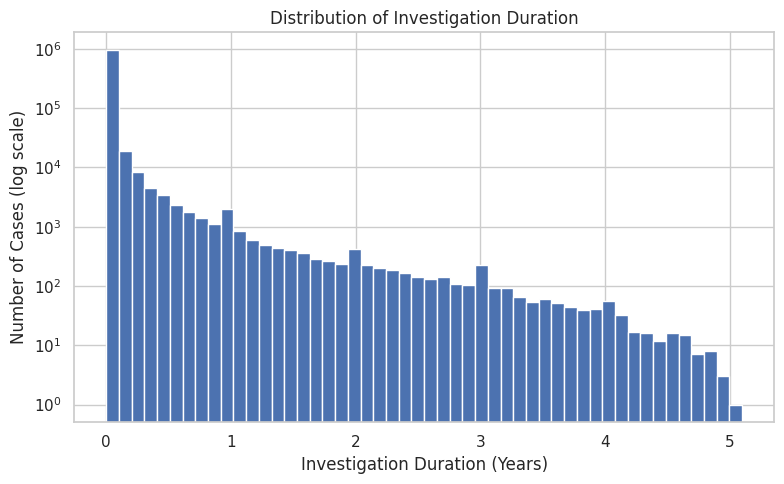

In [ ]:
# Plot:Distribution of Investigation Duration (Log Scale)
plt.figure(figsize=(8, 5))
plt.hist(
    df['investigation_duration_years'],
    bins=50,
    log=True
)
plt.xlabel('Investigation Duration (Years)')
plt.ylabel('Number of Cases (log scale)')
plt.title('Distribution of Investigation Duration')
plt.tight_layout()
plt.show()


This chart shows that most crime investigations are resolved relatively quickly, with a very large number of cases concentrated near zero duration. As investigation time increases, the number of cases drops sharply, forming a long right-hand tail: only a small fraction of cases remain open for several years. The log scale highlights that while long-running investigations are rare, they do exist and persist over time, indicating a subset of cases that are significantly harder to resolve due to factors such as limited evidence, case complexity, or procedural delays.

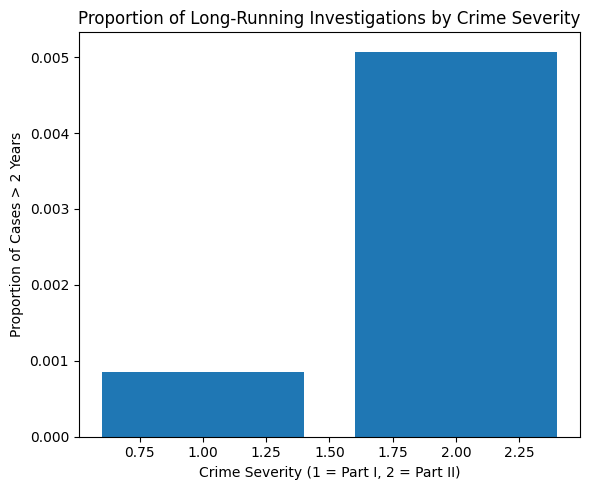

In [ ]:
# Defining long-running investigations
df['long_running'] = df['investigation_duration_years'] > 2

# Compute proportions by crime severity
severity_proportion = (
    df.groupby('part')['long_running']
      .mean()
      .reset_index()
)

# Plot: Long-Running Investigation Proportion by Severity
plt.figure(figsize=(6, 5))
plt.bar(
    severity_proportion['part'],
    severity_proportion['long_running']
)
plt.xlabel('Crime Severity (1 = Part I, 2 = Part II)')
plt.ylabel('Proportion of Cases > 2 Years')
plt.title('Proportion of Long-Running Investigations by Crime Severity')
plt.tight_layout()
plt.show()


This chart shows that **long-running investigations (those lasting more than 2 years)** are **much more common for Part II (less severe) crimes than for Part I (more severe) crimes**. While only a very small fraction of Part I cases extend beyond two years, the proportion is noticeably higher for Part II cases, even though it is still small overall. In simple terms, this suggests that less serious crimes are more likely to remain open for a long time, potentially because they receive lower investigative priority, fewer resources, or less sustained follow-up, rather than because they are inherently harder to solve.

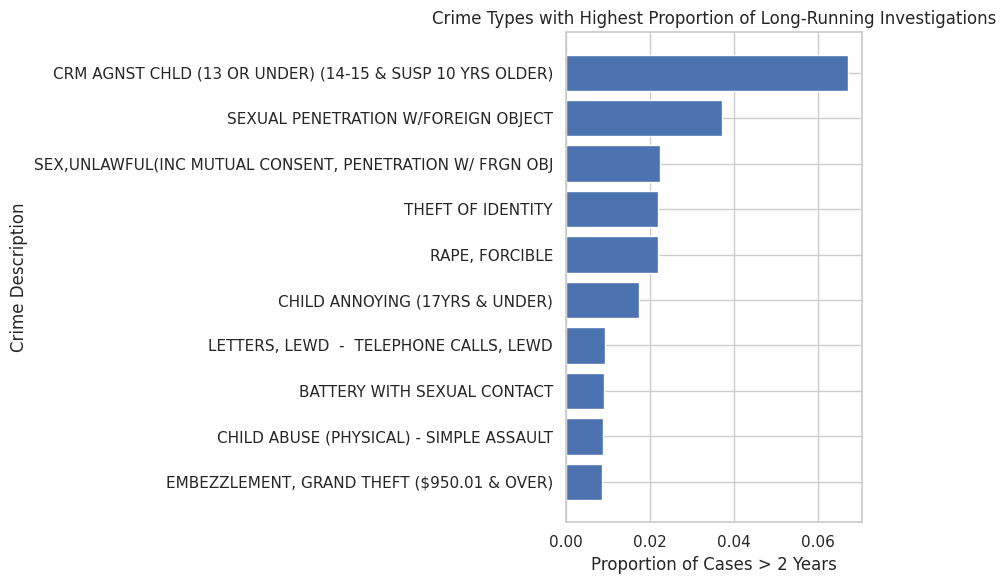

In [ ]:
# Minimum case threshold to avoid rare-category bias
MIN_CASES = 1000

# Compute long-running proportion by crime type
crime_stats = (
    df.groupby('crime_description')
      .agg(
          total_cases=('long_running', 'count'),
          long_running_rate=('long_running', 'mean')
      )
      .reset_index()
)

# Filter and select top crime types
top_long_running_crimes = (
    crime_stats[crime_stats['total_cases'] >= MIN_CASES]
    .sort_values('long_running_rate', ascending=False)
    .head(10)
)

# Plot: Crime Types with Highest Proportion of Long-Running Investigations
plt.figure(figsize=(9, 6))
plt.barh(
    top_long_running_crimes['crime_description'],
    top_long_running_crimes['long_running_rate']
)
plt.xlabel('Proportion of Cases > 2 Years')
plt.ylabel('Crime Description')
plt.title('Crime Types with Highest Proportion of Long-Running Investigations')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


This plot shows that **long-running investigations are more common in specific crime types**, especially those involving **sexual offenses, crimes against children, and identity-related crimes**. These cases often require more time due to **higher complexity, sensitivity, and legal procedures**, rather than a lack of effort or priority. Overall, the results suggest that **investigation delays are driven more by the nature of the crime than by how frequently it occurs**.


#3 — Data Cleaning & Preprocessing

In [ ]:
df.head(10)

,division_number,date_reported,date_occurred,time_occ,area,area_name,reporting_district,part,crime_code,crime_description,...,cross_street,latitude,longitude,victim_descent_label,year,hour,day_of_week,month,investigation_duration_years,long_running
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,NaN,34.2124,-118.4092,Hispanic,2020,8,Saturday,11,0.424367,False
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,N GAULT,34.1993,-118.4203,Hispanic,2020,18,Sunday,10,0.008214,False
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,NaN,34.1847,-118.4509,White,2020,12,Friday,10,4.112252,True
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,NaN,34.0339,-118.3747,Asian,2020,13,Thursday,12,0.000000,False
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,33.9813,-118.4350,Hispanic,2020,18,Tuesday,9,0.010951,False
5,240412063,2024-12-11,2020-11-11,1210,4,Hollenbeck,429,2,354,THEFT OF IDENTITY,...,NaN,34.0830,-118.1678,Black,2020,12,Wednesday,11,4.082136,True
6,240317069,2024-12-16,2020-04-16,1350,3,Southwest,396,2,354,THEFT OF IDENTITY,...,NaN,34.0100,-118.2900,Black,2020,13,Thursday,4,4.668036,True
7,201115217,2020-10-29,2020-07-07,1400,11,Northeast,1133,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,...,NaN,34.1107,-118.2589,Hispanic,2020,14,Tuesday,7,0.312115,False
8,241708596,2024-04-20,2020-03-02,1200,17,Devonshire,1729,2,354,THEFT OF IDENTITY,...,NaN,34.2763,-118.5210,White,2020,12,Monday,3,4.134155,True
9,242113813,2024-12-18,2020-09-01,900,21,Topanga,2196,2,354,THEFT OF IDENTITY,...,NaN,34.1493,-118.5886,White,2020,9,Tuesday,9,4.295688,True



# STEP 1: DROP NON-ESSENTIAL COLUMNS

**Goal: Reduce noise, avoid data leakage, and simplify the feature space**

**before applying feature engineering and modeling**


**1. Columns to Drop**

In [ ]:
columns_to_drop = [


    # IDENTIFIERS (NO PREDICTIVE VALUE)
    'division_number',
    # Unique case identifier; does not contain behavioral or temporal information
    # and would cause the model to memorize individual cases.


    # RAW DATE COLUMNS (ALREADY ENGINEERED)
    'date_reported',
    'date_occurred',
    # Raw dates are removed because meaningful temporal features
    # (year, month, day_of_week, hour) have already been extracted.
    # Keeping raw dates adds redundancy and risks leakage.



    # TIME COLUMN (REDUNDANT)
    'time_occ',
    # Original time field is dropped because the 'hour' feature
    # already captures the relevant temporal signal in a cleaner form.


    # LOCATION TEXT FIELDS (REDUNDANT / HIGH CARDINALITY)
    'area_name',
    # Area name is redundant since 'area' (numeric code) already represents it.
    # Text-based area names add no additional signal.


    'reporting_district',
    # Highly granular administrative identifier.
    # Does not generalize well and risks overfitting to specific districts.


    'cross_street',
    # Free-text location field with high missing values and no consistent structure.
    # Not suitable for structured modeling.


    # CRIME DESCRIPTION (REPLACED BY MAPPED CATEGORY)
    'crime_description',
    # Dropped because crimes are mapped from 'crime_code' into
    # semantically meaningful crime categories.
    # Keeping descriptions would be redundant and noisy.


    # VICTIM INFORMATION (SENSITIVE / LOW SIGNAL)
    'victim_descent_label',
    # Dropped to avoid introducing sensitive demographic bias.
    # Also showed weak predictive power in earlier EDA.


    # TARGET-LEAKAGE RELATED
    'investigation_duration_years',
    # This is the raw continuous outcome used to define the target.
    # Must be removed to prevent direct leakage into the model.

    # Crime Codes


]

# Apply column removal
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Dropping secondary crime code columns due to extreme missingness
# and negligible contribution to investigation delay prediction

secondary_crime_codes = [
    'crime_code_1',
    'crime_code_2',
    'crime_code_3',
    'crime_code_4'
]

df.drop(columns=secondary_crime_codes, inplace=True)


**2. Crime Category Mapping**

Individual crime codes are highly granular and arbitrary; grouping them into semantic crime categories reduces dimensionality, improves generalization, and allows the model to learn crime behavior rather than memorizing code-specific patterns.

In [ ]:
crime_mapping = {

    # --------------------
    # HOMICIDE
    # --------------------
    110: 'Homicide',
    113: 'Homicide',

    # --------------------
    # SEXUAL OFFENSES
    # --------------------
    **dict.fromkeys(
        [121,122,760,762,810,812,813,814,815,820,821,830,840,850,860,932,956,763,805,806],
        'Sexual Offense'
    ),

    # --------------------
    # ROBBERY
    # --------------------
    **dict.fromkeys([210,220], 'Robbery'),

    # --------------------
    # VIOLENT ASSAULT
    # --------------------
    **dict.fromkeys(
        [230,231,235,236,250,251,622,623,624,625,626,627,647,434,930],
        'Violent Assault'
    ),

    # --------------------
    # PROPERTY CRIME
    # --------------------
    **dict.fromkeys([310,320,330,410,924,933], 'Property Crime'),

    # --------------------
    # THEFT & FRAUD
    # --------------------
    **dict.fromkeys(
        [
            331,341,343,345,347,349,
            350,351,352,353,354,
            420,421,440,441,442,443,
            444,445,446,450,451,452,
            470,471,473,474,475,
            649,651,652,653,654,
            660,662,664,666,668,670,
            950,951,940
        ],
        'Theft & Fraud'
    ),

    # --------------------
    # VEHICLE CRIME
    # --------------------
    **dict.fromkeys([433,480,485,487,510,520,522], 'Vehicle Crime'),

    # --------------------
    # VANDALISM / ARSON
    # --------------------
    **dict.fromkeys([648,740,745,949], 'Vandalism / Arson'),

    # --------------------
    # WEAPONS / EXPLOSIVES
    # --------------------
    **dict.fromkeys([753,755,756,761,931], 'Weapons & Explosives'),

    # --------------------
    # DOMESTIC / CHILD RELATED
    # --------------------
    **dict.fromkeys([237,870,865,954], 'Domestic / Child Related'),

    # --------------------
    # PUBLIC ORDER / DISORDER
    # --------------------
    **dict.fromkeys(
        [432,435,436,437,438,439,880,882,884,886,888,890,928],
        'Public Order / Disorder'
    ),

    # --------------------
    # JUDICIAL / COURT RELATED
    # --------------------
    **dict.fromkeys([900,901,902,903,904,906,845,944,942], 'Judicial / Court Related'),

    # --------------------
    # KIDNAPPING / HUMAN TRAFFICKING
    # --------------------
    **dict.fromkeys([910,920,921,922,822], 'Kidnapping / Human Trafficking'),

    # --------------------
    # CYBER / FINANCIAL
    # --------------------
    **dict.fromkeys([661], 'Cyber / Financial Crime'),

    # --------------------
    # OTHER
    # --------------------
    **dict.fromkeys([943,946,948], 'Other')
}


In [ ]:
df['crime_category'] = df['crime_code'].map(crime_mapping)

# Dropping original crime_code after mapping
df.drop(columns=['crime_code'], inplace=True)


In [ ]:
df['crime_category'] = df['crime_category'].fillna('Other')


**4. Target Variable**

In [ ]:
# Convert boolean target to binary (False → 0, True → 1)
df['long_running'] = df['long_running'].astype(int)


**5. Applying KMeans geo-clustering to create geo-cluster from latitude and longitude**

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering on latitude & longitude
kmeans = KMeans(n_clusters=15, random_state=42)
df['geo_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Drop raw coordinates after clustering
df.drop(columns=['latitude', 'longitude'], inplace=True)


**6. Dropping year**

Why

* Dataset is concentrated in similar years

* Adds minimal signal

* Risk of temporal leakage (delay is already encoded in target)

In [ ]:
df.drop(columns=['year'], inplace=True)


**7. day_of_week: Ordinal Encoding**

In [ ]:
day_mapping = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)


**8. Clipping victim age to realistic range and binning them into different categories**

In [ ]:
# Clip victim age to a realistic range
df['victim_age'] = df['victim_age'].clip(lower=0, upper=100)


In [ ]:
#Defining age bins and labels
age_bins = [0, 12, 17, 24, 44, 64, 100]
age_labels = [
    'Child (0-12)',
    'Teen (13-17)',
    'Young Adult (18-24)',
    'Adult (25-44)',
    'Middle Aged (45-64)',
    'Senior (65+)'
]

# Create a new binned age column
df['victim_age_group'] = pd.cut(
    df['victim_age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True
)

# Dropping original age
df.drop(columns=['victim_age'], inplace=True)


In [ ]:
df['victim_age_group'].value_counts()


,count
victim_age_group,
Adult (25-44),367359
Child (0-12),277614
Middle Aged (45-64),192194
Young Adult (18-24),94949
Senior (65+),55511
Teen (13-17),17267


In [ ]:
# Step 1: Replace missing values with 'Unknown'
df['victim_sex'] = df['victim_sex'].fillna('Unknown')

# Step 2: Normalize and clean victim sex values
df['victim_sex'] = df['victim_sex'].replace({
    'M': 'Male',
    'F': 'Female',
    'X': 'Other',      # Non-binary / unspecified
    'H': 'Unknown',   # Invalid / legacy code
    '-': 'Unknown'    # Placeholder
})

# Step 3:Convert to category dtype
df['victim_sex'] = df['victim_sex'].astype('category')


**8. Dealing with victim Descent**

In [ ]:
# Replace missing values
df['victim_descent'] = df['victim_descent'].fillna('Unknown')

# Group rare categories
top_descent = df['victim_descent'].value_counts().nlargest(8).index
df['victim_descent'] = df['victim_descent'].apply(
    lambda x: x if x in top_descent else 'Other'
)


**9. modus_operandi**

Create:

* mo_present (binary)

* mo_code_count (complexity)

Why

Raw text is messy abd Complexity correlates with investigation duration

In [ ]:
# Binary indicator for presence of MO
df['mo_present'] = df['modus_operandi'].notna().astype(int)

# Count number of MO codes (split by space)
df['mo_code_count'] = df['modus_operandi'].fillna('').apply(
    lambda x: len(x.split()) if x else 0
)

# Dropping raw
df.drop(columns=['modus_operandi'], inplace=True)


**10 Premise Code**

In [ ]:
# Number of unique premise codes
df['premise_code'].nunique()


314

In [ ]:
# Frequency distribution of premise codes
# Shows whether most crimes happen in a few environments or are evenly spread.
premise_counts = df['premise_code'].value_counts()
premise_counts.head(10)


,count
premise_code,
101.0,261261
501.0,163650
502.0,119010
108.0,69142
203.0,47646
102.0,40861
122.0,29300
707.0,19362
104.0,16081


In [ ]:
# Total number of records
total_records = len(df)

# Premise codes appearing in less than 1% of data
rare_premises = premise_counts[premise_counts < 0.01 * total_records]

# How many are rare?
len(rare_premises)


303

In [ ]:
# Percentage of records covered by rare premise codes
rare_coverage = rare_premises.sum() / total_records
rare_coverage


np.float64(0.2107884015627519)

<Axes: title={'center': 'Top 20 Premise Codes'}, xlabel='premise_code'>

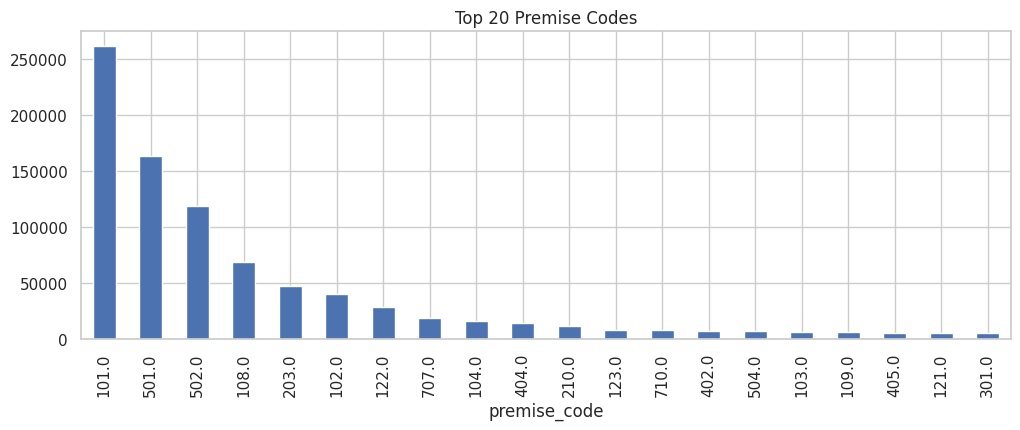

In [ ]:
# Top 20 premise codes
premise_counts.head(20).plot(kind='bar', figsize=(12,4), title='Top 20 Premise Codes')


Premise codes have high cardinality, meaning there are many unique values, most of which occur very rarely. Encoding all of them would increase feature sparsity, encourage the model to memorize noise, and negatively impact generalization and performance. To avoid this, we keep only the most frequent premise codes and group rare ones into an “Other” category, preserving meaningful environmental patterns while reducing complexity and improving model stability.

In [ ]:
# Count frequency of each premise code
premise_counts = df['premise_code'].value_counts()

# Define threshold: keep premise codes appearing in at least 1% of the data
threshold = 0.01 * len(df)

# Identify frequent premise codes
frequent_premises = premise_counts[premise_counts >= threshold].index

# Group rare premise codes into 'Other'
df['premise_code_grouped'] = df['premise_code'].where(
    df['premise_code'].isin(frequent_premises),
    'Other'
)

# Drop original premise_code (optional, once grouping is confirmed)
df.drop(columns=['premise_code'], inplace=True)


**Weapon Inspection**

In [ ]:
# Count unique weapon codes (excluding NaN)
weapon_counts = df['weapon_code'].value_counts(dropna=True)

# How many unique weapon types?
weapon_counts.shape[0]


79

In [ ]:
# Extract unique weapon descriptions and sort them alphabetically
unique_weapons = df['weapon_description'].dropna().unique()
unique_weapons.sort()

# Print the list
for weapon in unique_weapons:
    print(weapon)

AIR PISTOL/REVOLVER/RIFLE/BB GUN
ANTIQUE FIREARM
ASSAULT WEAPON/UZI/AK47/ETC
AUTOMATIC WEAPON/SUB-MACHINE GUN
AXE
BELT FLAILING INSTRUMENT/CHAIN
BLACKJACK
BLUNT INSTRUMENT
BOARD
BOMB THREAT
BOTTLE
BOW AND ARROW
BOWIE KNIFE
BRASS KNUCKLES
CAUSTIC CHEMICAL/POISON
CLEAVER
CLUB/BAT
CONCRETE BLOCK/BRICK
DEMAND NOTE
DIRK/DAGGER
DOG/ANIMAL (SIC ANIMAL ON)
EXPLOXIVE DEVICE
FIRE
FIXED OBJECT
FOLDING KNIFE
GLASS
HAMMER
HAND GUN
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE
HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE
ICE PICK
KITCHEN KNIFE
KNIFE WITH BLADE 6INCHES OR LESS
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
LIQUOR/DRUGS
M-14 SEMIAUTOMATIC ASSAULT RIFLE
M1-1 SEMIAUTOMATIC ASSAULT RIFLE
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON
MACE/PEPPER SPRAY
MACHETE
MARTIAL ARTS WEAPONS
OTHER CUTTING INSTRUMENT
OTHER FIREARM
OTHER KNIFE
PHYSICAL PRESENCE
PIPE/METAL PIPE
RAZOR
RAZOR BLADE
RELIC FIREARM
REVOLVER
RIFLE
ROCK/THROWN OBJECT
ROPE/LIGATURE
SAWED OFF RIFLE/SHOTGUN
SC

We are restructuring the weapon information because the raw weapon_description
field is extremely granular, sparse, and inconsistent, which makes it unsuitable for direct modeling. Our goal is not to predict outcomes based on the exact weapon name, but to capture whether the severity and lethality of the weapon involved meaningfully influence investigation delays. By systematically reviewing all unique weapon descriptions, we avoid assumptions, ensure completeness, and prevent missing important categories. Grouping weapons into a high-risk vs non-high-risk indicator allows the model to learn from investigative complexity and seriousness rather than memorizing hundreds of rare weapon labels, improving both robustness and interpretability.

Intentionally not classified as high-risk

These are excluded because they generally indicate lower lethality, opportunistic violence, or situational force, and grouping them as high-risk would dilute signal:

> BLUNT INSTRUMENT, BOARD, BOTTLE, CLUB/BAT

> BRASS KNUCKLES, BLACKJACK

> PHYSICAL PRESENCE, STRONG-ARM

> TOY GUN, SIMULATED GUN

> VEHICLE (used as weapon is context-dependent; too noisy)

> VERBAL THREAT, DEMAND NOTE

> LIQUOR/DRUGS

> DOG/ANIMAL

> UNKNOWN WEAPON/OTHER WEAPON

> FIXED OBJECT, ROCK/THROWN OBJECT, STICK, SCREWDRIVER, SCISSORS

In [ ]:
def classify_weapon(desc):
    if pd.isna(desc):
        return "Unknown"

    d = desc.upper()

    # FIREARMS (high-risk)
    if any(k in d for k in [
        "HAND GUN", "PISTOL", "REVOLVER", "RIFLE", "SHOTGUN",
        "FIREARM", "ASSAULT", "AK47", "UZI", "SEMIAUTOMATIC",
        "AUTOMATIC", "SUB-MACHINE", "SAWED OFF"
    ]):
        return "Firearm"

    # EXPLOSIVES (high-risk)
    if any(k in d for k in ["BOMB", "EXPLOSIVE", "DEVICE"]):
        return "Explosive"

    # SHARP WEAPONS
    if any(k in d for k in [
        "KNIFE", "DAGGER", "MACHETE", "SWORD",
        "RAZOR", "ICE PICK", "CLEAVER", "SCISSORS"
    ]):
        return "Sharp Weapon"

    # BLUNT WEAPONS
    if any(k in d for k in [
        "BAT", "CLUB", "PIPE", "ROCK", "HAMMER",
        "TIRE IRON", "BLACKJACK", "STICK", "BRICK"
    ]):
        return "Blunt Weapon"

    # CHEMICAL / FIRE
    if any(k in d for k in [
        "FIRE", "SCALDING", "CHEMICAL", "POISON"
    ]):
        return "Chemical / Fire"

    # VEHICLE
    if "VEHICLE" in d:
        return "Vehicle"

    # PERSONAL FORCE
    if any(k in d for k in [
        "STRONG-ARM", "HANDS", "FIST", "FEET",
        "PHYSICAL PRESENCE", "ANIMAL"
    ]):
        return "Personal Force"

    # THREAT / SIMULATED
    if any(k in d for k in [
        "VERBAL", "DEMAND NOTE", "SIMULATED",
        "TOY GUN", "STARTER PISTOL"
    ]):
        return "Threat / Simulated"

    return "Other Weapon"


In [ ]:
df["weapon_group"] = df["weapon_description"].apply(classify_weapon)
df["weapon_group"].value_counts()


,count
weapon_group,
Unknown,677678
Personal Force,175737
Other Weapon,49584
Firearm,39231
Threat / Simulated,25316
Sharp Weapon,20974
Blunt Weapon,11767
Vehicle,3260
Chemical / Fire,1067


Unknown ≠ error
It means “no weapon or insufficient information”, which is analytically correct.

In [ ]:
# Check the number of missing values in 'weapon description'
missing_count = df['weapon_description'].isnull().sum()

print(f"Number of missing values in 'crime description': {missing_count}")

Number of missing values in 'crime description': 677678


In [ ]:
# Create a binary indicator for weapon usage
# 0 = No real weapon used (Unknown / Threat / Simulated)
# 1 = Actual weapon involved

df["weapon_used"] = (~df["weapon_group"].isin([
    "Unknown",
    "Threat / Simulated"
])).astype(int)


In [ ]:
df["weapon_used"].value_counts()


,count
weapon_used,
0,702994
1,301900


In [ ]:
# Drop redundant and high-noise columns
df.drop(columns=[
    'premise_description', # already covered by premise code
    'weapon_code',
    'weapon_description',
    'location'
], inplace=True)


In [ ]:
# Keep only IC and arrest-related outcomes
valid_statuses = ['IC', 'AA', 'AO', 'JA']
df = df[df['status'].isin(valid_statuses)].copy()


Removed administrative noise (CC, JO)

In [ ]:
# Investigation delay target
status_map = {
    'IC': 1,  # Investigation continued (delayed)
    'AA': 0,  # Solved cases
    'AO': 0,
    'JA': 0
}

df['status_encoded'] = df['status'].map(status_map)


In [ ]:
print(df['status_encoded'].value_counts())
print(df['status_encoded'].value_counts(normalize=True))


status_encoded
1    802772
0    200236
Name: count, dtype: int64
status_encoded
1    0.800365
0    0.199635
Name: proportion, dtype: float64


In [ ]:
# --------------------------------------------------
# Final missing value check
# --------------------------------------------------

print(df.isnull().sum())


area                    0
part                    0
victim_sex              0
victim_descent          0
status                  0
status_description      0
hour                    0
day_of_week             0
month                   0
long_running            0
crime_category          0
geo_cluster             0
victim_age_group        0
mo_present              0
mo_code_count           0
premise_code_grouped    0
weapon_group            0
weapon_used             0
status_encoded          0
dtype: int64


In [ ]:
df[['status_encoded']].head()


,status_encoded
0,1
1,1
2,1
3,1
4,1


In [ ]:
df[['status', 'status_encoded']].value_counts()


,,count
status,status_encoded,
IC,1,802772
AO,0,109799
AA,0,87152
JA,0,3285


JO (Juvenile Other) → ambiguous outcome

CC (Case Closed) → timing unclear, administratively closed

In [ ]:
df.drop(columns=[
  'status',
  'status_description'

], inplace=True)


In [ ]:
df.drop(columns=[
  'long_running'
], inplace=True)

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1003008 entries, 0 to 1004893
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   area                  1003008 non-null  int64   
 1   part                  1003008 non-null  int64   
 2   victim_sex            1003008 non-null  category
 3   victim_descent        1003008 non-null  object  
 4   hour                  1003008 non-null  int64   
 5   day_of_week           1003008 non-null  int64   
 6   month                 1003008 non-null  int32   
 7   crime_category        1003008 non-null  object  
 8   geo_cluster           1003008 non-null  int32   
 9   victim_age_group      1003008 non-null  category
 10  mo_present            1003008 non-null  int64   
 11  mo_code_count         1003008 non-null  int64   
 12  premise_code_grouped  1003008 non-null  object  
 13  weapon_group          1003008 non-null  object  
 14  weapon_used           1

,area,part,victim_sex,victim_descent,hour,day_of_week,month,crime_category,geo_cluster,victim_age_group,mo_present,mo_code_count,premise_code_grouped,weapon_group,weapon_used,status_encoded
0,15,2,Male,H,8,5,11,Theft & Fraud,8,Adult (25-44),1,1,501.0,Unknown,0,1
1,15,1,Male,H,18,6,10,Violent Assault,13,Adult (25-44),1,8,102.0,Sharp Weapon,1,1
2,9,2,Male,W,12,4,10,Theft & Fraud,13,Adult (25-44),1,1,501.0,Unknown,0,1
3,7,1,Female,A,13,3,12,Theft & Fraud,0,Middle Aged (45-64),1,1,101.0,Unknown,0,1
4,14,1,Male,H,18,1,9,Theft & Fraud,12,Middle Aged (45-64),1,4,Other,Unknown,0,1


In [ ]:
final_columns = [
    'area',
    'part',
    'victim_sex',
    'victim_descent',
    'hour',
    'day_of_week',
    'month',
    'crime_category',
    'geo_cluster',
    'victim_age_group',
    'mo_present',
    'mo_code_count',
    'premise_code_grouped',
    'weapon_group',
    'weapon_used',
    'status_encoded'   # target LAST
]

df = df[final_columns]


In [ ]:
import os

os.getcwd()


'/content'

In [ ]:
df.to_csv('/content/lapd_clean_model_ready.csv', index=False)


In [ ]:
from google.colab import files

files.download('/content/lapd_clean_model_ready.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>